# Entendendo a base de dados

In [1]:
import plotly.express as px
import pandas as pd

In [2]:
mensagens = pd.read_csv('/content/drive/MyDrive/IA EXPERT ACADEMY/02. Mineração e Análise de Dados do LinkedIn/Mineração e Análise de Dados do LinkedIn/mensagens.csv')
mensagens.drop(labels=['Unnamed: 0'], axis=1, inplace=True)
mensagens.sample(5)

,CONTENT
425,Olá Gabriel! Já adicionei :) Que bom que está ...
266,"olá Professor, sou aluno do mestrado da UTFPR ..."
365,"tens algum site, com links da udemy que te com..."
243,Olá Gean! Infelizmente por hora não trabalho c...
148,"Olá Pedro! Para iniciar, recomendo este curso:..."


In [3]:
# Vendo se tem valores nulos
mensagens.isnull().sum()

CONTENT    0
dtype: int64

In [4]:
# Acessando mensagens aleatorias
mensagens['CONTENT'][9]

'Olá Nilo! Vi seu e-mail e em breve respondo por lá :)'

In [5]:
mensagens.describe()

,CONTENT
count,447
unique,425
top,👍
freq,9


Top é a mensagem que mais se repete

# Preeprocessamento

Basicamente vamos fazer uma função para tirar os links,tags  colocar em minusculo e retirar as stopwords de todos os registros da nossa base

In [6]:
from bs4 import BeautifulSoup
import re
import nltk
import string
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [7]:
# São as stop words
print(nltk.corpus.stopwords.words('portuguese'))

['a', 'à', 'ao', 'aos', 'aquela', 'aquelas', 'aquele', 'aqueles', 'aquilo', 'as', 'às', 'até', 'com', 'como', 'da', 'das', 'de', 'dela', 'delas', 'dele', 'deles', 'depois', 'do', 'dos', 'e', 'é', 'ela', 'elas', 'ele', 'eles', 'em', 'entre', 'era', 'eram', 'éramos', 'essa', 'essas', 'esse', 'esses', 'esta', 'está', 'estamos', 'estão', 'estar', 'estas', 'estava', 'estavam', 'estávamos', 'este', 'esteja', 'estejam', 'estejamos', 'estes', 'esteve', 'estive', 'estivemos', 'estiver', 'estivera', 'estiveram', 'estivéramos', 'estiverem', 'estivermos', 'estivesse', 'estivessem', 'estivéssemos', 'estou', 'eu', 'foi', 'fomos', 'for', 'fora', 'foram', 'fôramos', 'forem', 'formos', 'fosse', 'fossem', 'fôssemos', 'fui', 'há', 'haja', 'hajam', 'hajamos', 'hão', 'havemos', 'haver', 'hei', 'houve', 'houvemos', 'houver', 'houvera', 'houverá', 'houveram', 'houvéramos', 'houverão', 'houverei', 'houverem', 'houveremos', 'houveria', 'houveriam', 'houveríamos', 'houvermos', 'houvesse', 'houvessem', 'houvésse

In [8]:
# Pontuações
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [9]:
def pre_processamento(texto):
  texto = texto.lower()# Botando em minusculo
  texto = BeautifulSoup(texto, 'lxml').text # Tirando as tags html
  texto = re.sub(r'https?://[A-Za-z0-9./]+', ' ', texto)  # Tirando os links

  # vamos tambem tranformar a frase em uma lista de tokens, para conseguirmos tirar as stop words
  tokens = []
  for token in nltk.word_tokenize(texto):
    if (token not in nltk.corpus.stopwords.words('portuguese')) and (token not in string.punctuation): # TIrando as stopwords
      tokens.append(token)

  texto_formatado = ' '.join(str(token) for token in tokens)
  return texto_formatado

In [10]:
mensagens['CONTENT'][446]

'<p class="spinmail-quill-editor__spin-break">Olá Jones,</p><p class="spinmail-quill-editor__spin-break"><br></p><p class="spinmail-quill-editor__spin-break">Com o <strong>Robotic Process Automation (RPA)</strong> otimize o tempo da sua equipe de trabalho para conseguir o foco em atividades produtivas.</p><p class="spinmail-quill-editor__spin-break"><br></p><p class="spinmail-quill-editor__spin-break">De acordo com a WorkMarket, 78% dos líderes de negócios dizem que com a automação, você pode otimizar as atividades economizando até mais de 3 horas por dia.</p><p class="spinmail-quill-editor__spin-break"><br></p><p class="spinmail-quill-editor__spin-break">Com este guia, você conhecerá a solução para reduzir custos, minimizar erros e liberar seus funcionários de tarefas administrativas repetitivas.</p><p class="spinmail-quill-editor__spin-break"><br></p><p class="spinmail-quill-editor__spin-break"><a rel="noopener" href="https://ad.doubleclick.net/ddm/trackclk/N1114924.158707LINKEDIN/B2

In [11]:
texto_novo = pre_processamento(mensagens['CONTENT'][446])
texto_novo

'olá jones robotic process automation rpa otimize tempo equipe trabalho conseguir foco atividades produtivas.de acordo workmarket 78 líderes negócios dizem automação pode otimizar atividades economizando 3 horas dia.com guia conhecerá solução reduzir custos minimizar erros liberar funcionários tarefas administrativas repetitivas.saiba sobre ibm digital business automation'

In [12]:
mensagens['CONTENT'] = mensagens['CONTENT'].apply(pre_processamento)

<ipython-input-9-58fcc1816d17>:3: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  texto = BeautifulSoup(texto, 'lxml').text # Tirando as tags html


In [13]:
mensagens['CONTENT']

0      hi milos we are developing kind of social netw...
1      hi jones we are after an ios developer with se...
2                                         valeu anderson
3      obrigado jones adicionar aluno lá udemy cirso ...
4                                                      👍
                             ...                        
442    olá jones.estes tempos difíceis negócios todo ...
443    oi jones aqui josé estan sócio idwall empresa ...
444    oi jones aqui josé estan sócio idwall empresa ...
445    olá jones buscando novo emprego encontre vagas...
446    olá jones robotic process automation rpa otimi...
Name: CONTENT, Length: 447, dtype: object

# Adicionando colunas relevantes

tamanho e numero de palavras

In [14]:
mensagens['Tamanho'] = mensagens['CONTENT'].apply(len) # Tamanho da mensagem
mensagens.head()

,CONTENT,Tamanho
0,hi milos we are developing kind of social netw...,145
1,hi jones we are after an ios developer with se...,258
2,valeu anderson,14
3,obrigado jones adicionar aluno lá udemy cirso ...,75
4,👍,1


In [15]:
mensagens['Tamanho'].describe()

count     447.000000
mean       95.988814
std       145.515282
min         0.000000
25%        22.500000
50%        41.000000
75%       102.000000
max      1044.000000
Name: Tamanho, dtype: float64

In [16]:
# Função para determinar a quantidade de palavras em uma frase
def contagem_palavras(texto):
  return len(texto.split())

In [17]:
mensagens['Palavras'] = mensagens['CONTENT'].apply(contagem_palavras) # numero de palavras
mensagens.head()

,CONTENT,Tamanho,Palavras
0,hi milos we are developing kind of social netw...,145,29
1,hi jones we are after an ios developer with se...,258,47
2,valeu anderson,14,2
3,obrigado jones adicionar aluno lá udemy cirso ...,75,11
4,👍,1,1


In [18]:
mensagens['Palavras'].describe()

count    447.000000
mean      13.279642
std       18.520867
min        0.000000
25%        3.000000
50%        6.000000
75%       14.000000
max      132.000000
Name: Palavras, dtype: float64

Como vamos trabalhar com analise de sentimentos, seria bom tirar algumas mensagens com poucas palavras, uma vez que essas sao mais dificeis de analisar e provavelmente gerariam erros


In [19]:
mensagens.shape

(447, 3)

In [20]:
# Menos que 5 palavras
mensagens = mensagens[mensagens['Palavras'] > 5]
mensagens.shape

(255, 3)

Com isso apagamos boa parte dos registros


# Identificando o idioma das mensagens

Criamos uma coluna com o idioma do registro

In [21]:
!python3 -m spacy download pt # Importando em portuges

2023-07-14 16:01:03.054062: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-07-14 16:01:04.416861: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
⚠ As of spaCy v3.0, shortcuts like 'pt' are deprecated. Please use the
full pipeline package name 'pt_core_news_sm' instead.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.0/13.0 MB 62.3 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('pt_core_news_sm')


In [22]:
!pip install spacy-langdetect

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 998.1/998.1 kB 13.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for langdetect: filename=langdetect-1.0.7-py3-none-any.whl size=993416 sha256=3c2ff5fe1458aec664e6c45ae4abb6994182bf325b07c750e5b7f1e288dd96b8
  Stored in directory: /root/.cache/pip/wheels/97/f1/e4/8b73f7a0421b132755956892d29b1e764d3e0857a6e92e32fe
Successfully built langdetect


In [23]:
import spacy
from spacy.language import Language
from spacy_langdetect import LanguageDetector

@Language.factory("language_detector")
def create_language_detector(nlp, name): # tem que colocar essa função pra instanciar o detector e conseguir add pipe
    return LanguageDetector()



In [24]:
pln = spacy.load('pt_core_news_sm')
pln.add_pipe('language_detector')

In [25]:
texto = 'Este é um texto em português'
doc = pln(texto)
print(doc._.language)

{'language': 'pt', 'score': 0.9999972953739591}


In [26]:
texto = 'this is america'
doc = pln(texto)
print(doc._.language)

{'language': 'en', 'score': 0.9999963832876313}


In [27]:
# vamos adicionar a coluna com a lingua na base de dados
mensagens = mensagens.reset_index(drop = True) # Temos que resetar pois apagamos alguns registros anteriormente
mensagens['Idioma'] = None
for i in range(len(mensagens)):
  doc = pln(mensagens['CONTENT'][i])
  mensagens['Idioma'][i] = doc._.language['language']

mensagens.sample(5)

<ipython-input-27-019ce08b005e>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mensagens['Idioma'][i] = doc._.language['language']


,CONTENT,Tamanho,Palavras,Idioma
251,oi jones aqui josé estan sócio idwall empresa ...,871,117,pt
126,olá gean infelizmente hora trabalho consultori...,89,12,pt
127,jones bom dia tudo bem gostaria saber disponib...,264,29,pt
186,ola jones segue -silveira/ hoje olhando cursos...,73,11,pt
8,olá jones tudo bem comprei alguns cursos sobre...,544,70,pt


In [28]:
# Histograma de linhas
grafico = px.histogram(x=mensagens['Idioma'])
grafico.show()

In [29]:
# Criando dois subdataframes
mensagens_pt = mensagens[mensagens['Idioma'] == 'pt']
mensagens_pt.shape

(221, 4)

In [30]:
mensagens_en = mensagens[mensagens['Idioma'] == 'en']
mensagens_en.shape

(11, 4)

# Gerando nuvem de palavras


In [31]:
# Primeiramente temos que converter os textos para formato de lista
textos = mensagens_pt['CONTENT'].tolist() # Cada texto vira um elemento da lista
textos = ' '.join(textos) # Transformamos a lista em uma string
print(textos)

olá nilo vi e-mail breve respondo lá olá jones tudo bem nome nilo guimarães assim professor plataforma udemy -guimaraes recentemente fiz estratégia aumentou consideravelmente vendas instrutor udemy parceiro fernando amaral basicamente fizemos colocar fernado amaral co-autor cursos forma pode enviar anúncio udemy 86 mil alunos divulgando curso único anúncio udemy conquistamos muitos novos alunos curso co-autoria ação rendeu boa receita extra visto 57 mil alunos imagino acontecerá pico vendas fizermos parceria semelhante algum cursos pensa respeito desta ideia obrigado nilo guimarães olá diego nesse curso abaixo nada avançado -20-guia-completo-novo-tensorflow/ jones boa noite tudo bem algum curso sobre deploy ml hoje faço usando pickle acredito boa prática olá davi puder repassar texto e-mail jones iaexpert.com.br aí fica fácil pra responder olá jones tudo bem comprei alguns cursos sobre machine learning visão computacional fazendo tcc engenharia gostaria saber poderia tirar dúvida tcc s

In [32]:
len(textos)

36624

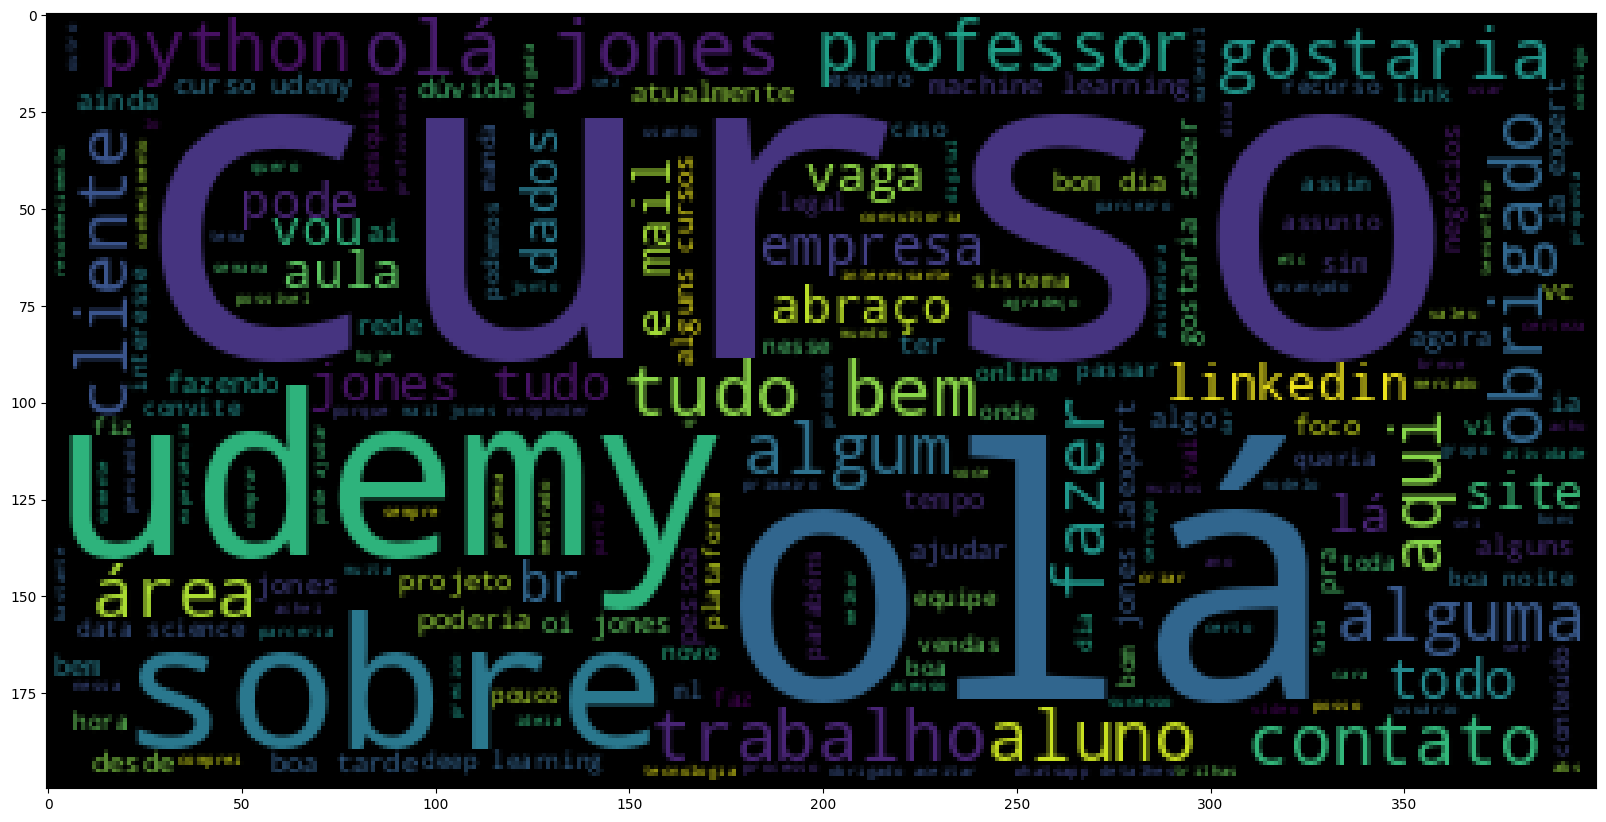

In [33]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.figure(figsize=(20,20))
plt.imshow(WordCloud().generate(textos));

# Extração das entidades nomeadas

é uma expressão que pode ser extraída de um texto e é essencial para compreender, concluir ou ignorar um determinado contexto ou ação

In [34]:
documento = pln(textos)

In [35]:
from spacy import displacy
displacy.render(documento, style = 'ent', jupyter=True)

In [36]:
# Queremos identificar todas as pessoas
for entidade in documento.ents:
  if entidade.label_ == 'PERSON':
    print(entidade.text, entidade.label_)

# Classificação de sentimentos em inglês

Criamos um atributo com o idioma no df de mensagens em ingles

In [37]:
mensagens_en.head()

,CONTENT,Tamanho,Palavras,Idioma
0,hi milos we are developing kind of social netw...,145,29,en
1,hi jones we are after an ios developer with se...,258,47,en
24,congrats on your work anniversary 👏👏,36,6,en
37,hi jones i founded teachinguide.com to help ud...,143,24,en
57,hi shrey can you send more details to contato ...,68,11,en


In [38]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [39]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [40]:
classificador = SentimentIntensityAnalyzer() # Instanciando o classificador ja  treinado na biblioteca
classificador.polarity_scores('I love this food')

{'neg': 0.0, 'neu': 0.323, 'pos': 0.677, 'compound': 0.6369}

In [41]:
classificador.polarity_scores('I hate this food')

{'neg': 0.649, 'neu': 0.351, 'pos': 0.0, 'compound': -0.5719}

In [42]:
classificador.polarity_scores('I have this food')

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

In [43]:
mensagens_en = mensagens_en.reset_index(drop=True)

In [44]:
mensagens_en['Sentimento'] = None
for i in range(len(mensagens_en)):
  sentimento = classificador.polarity_scores(mensagens_en['CONTENT'][i])
  # Vamos fazer varios if's para descobrir qual é o maior valor dentro do dicionario
  if sentimento['pos'] > sentimento['neg'] and sentimento['pos'] > sentimento['neu']:
    mensagens_en['Sentimento'][i] = 'Positivo'
  elif sentimento['neg'] > sentimento['pos'] and sentimento['neg'] > sentimento['neu']:
    mensagens_en['Sentimento'][i] = 'Negativo'
  elif sentimento['neu'] > sentimento['pos'] and sentimento['neu'] > sentimento['neg']:
    mensagens_en['Sentimento'][i] = 'Neutro'
  else:
    mensagens_en['Sentimento'][i] = 'Sem classificação'

<ipython-input-44-bf2d8a459e65>:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-44-bf2d8a459e65>:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [45]:
mensagens_en

,CONTENT,Tamanho,Palavras,Idioma,Sentimento
0,hi milos we are developing kind of social netw...,145,29,en,Neutro
1,hi jones we are after an ios developer with se...,258,47,en,Neutro
2,congrats on your work anniversary 👏👏,36,6,en,Neutro
3,hi jones i founded teachinguide.com to help ud...,143,24,en,Neutro
4,hi shrey can you send more details to contato ...,68,11,en,Neutro
5,hi jones i hope you 're in the pinkest of your...,289,49,en,Neutro
6,mensagens voltando envio email segue link _3in...,86,8,en,Neutro
7,rafael gallo removed jones granatyr from the c...,57,8,en,Neutro
8,hi sean i hope you like the course,34,8,en,Positivo
9,afternoon jones just taking your new course ne...,122,22,en,Neutro


Uma vez que as mensagens no LinKedin sao apenas trocas de informações, a grande maioria das mensagens são neutras, visualizaremos isso no grafico abaixo

In [46]:
grafico = px.histogram(x=mensagens_en['Sentimento'])
grafico.show()

# Classificação de sentimentos em portugues

no caso da lingua portuguesa, nao temos um classificador ja treinado na biblioteca nltk, como temos para ingles, logo, temos que criar um, faremos isso com a base de dados do twitter, e depois aplicatemos na nossa base de mensagens em portugues

## Criando o classificador

### Importações

In [57]:
import spacy
import string
import random
import seaborn as sns
import numpy as np
import re
import pandas as pd

In [55]:
!python3 -m spacy download pt

2023-07-14 16:05:56.092909: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
⚠ As of spaCy v3.0, shortcuts like 'pt' are deprecated. Please use the
full pipeline package name 'pt_core_news_sm' instead.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.0/13.0 MB 52.8 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('pt_core_news_sm')


### Carregamento da base de dados

1 - sentimento positivo
0 - sentimento negativo

In [63]:
train = pd.read_csv('/content/drive/MyDrive/IA EXPERT ACADEMY/02. Mineração e Análise de Dados do LinkedIn/Mineração e Análise de Dados do LinkedIn/Train50.csv', delimiter=';')
train.head()

,id,tweet_text,tweet_date,sentiment,query_used
0,1050785521201541121,@Laranjito76 A pessoa certa para isso seria o ...,Fri Oct 12 16:29:25 +0000 2018,1,:)
1,1050785431955140608,"@behin_d_curtain Para mim, é precisamente o co...",Fri Oct 12 16:29:04 +0000 2018,1,:)
2,1050785401248645120,Vou fazer um video hoje... estou pensando em f...,Fri Oct 12 16:28:56 +0000 2018,1,:)
3,1050785370982547461,"aaaaaaaa amei tanto essas polaroids, nem sei e...",Fri Oct 12 16:28:49 +0000 2018,1,:)
4,1050785368902131713,Valoriza o coração do menininho que vc tem. El...,Fri Oct 12 16:28:49 +0000 2018,1,:)


In [62]:
test = pd.read_csv('/content/drive/MyDrive/IA EXPERT ACADEMY/02. Mineração e Análise de Dados do LinkedIn/Mineração e Análise de Dados do LinkedIn/Test.csv', delimiter=';')
test.head()

,id,tweet_text,tweet_date,sentiment,query_used
0,1029536486021099522,@Gazo1a Nossa! Muito obrigada :),Wed Aug 15 01:13:20 +0000 2018,1,:)
1,1029536496368406528,@BerzGamer vai pa puta que te pariu :),Wed Aug 15 01:13:23 +0000 2018,1,:)
2,1029536531655131137,QUER MAIS DESCONTOS? (14/08) ⭐⭐⭐⭐⭐ 🌐 Confira n...,Wed Aug 15 01:13:31 +0000 2018,1,:)
3,1029536560117678081,"EU VOU PEGAR VCS, ME AJUDEM GALERA, PELO AMOR ...",Wed Aug 15 01:13:38 +0000 2018,1,:)
4,1029536605852377088,Estávamos em casa do Zé e eu estava a morrer d...,Wed Aug 15 01:13:49 +0000 2018,1,:)


In [64]:
train.shape, test.shape

((50000, 5), (5000, 5))

<Axes: xlabel='sentiment', ylabel='count'>

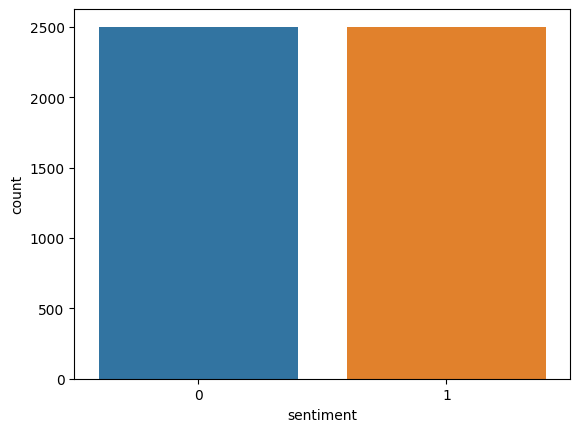

In [70]:
# Quantos twitts temos de cada sentimento
sns.countplot(x=test['sentiment'], label= 'Contagem')

In [ ]:
# Quantos twitts temos de cada sentimento
sns.countplot(x=train['sentiment'], label= 'Contagem')

In [67]:
# Nao precisamos dos outros atributos, apenas do tt e do sentimento
train.drop(['id', 'tweet_date', 'query_used'], axis=1, inplace=True)
test.drop(['id', 'tweet_date', 'query_used'], axis=1, inplace=True)

In [68]:
train.head()

,tweet_text,sentiment
0,@Laranjito76 A pessoa certa para isso seria o ...,1
1,"@behin_d_curtain Para mim, é precisamente o co...",1
2,Vou fazer um video hoje... estou pensando em f...,1
3,"aaaaaaaa amei tanto essas polaroids, nem sei e...",1
4,Valoriza o coração do menininho que vc tem. El...,1


In [71]:
# Vendo se temos valores nulls
train.isnull().sum(), test.isnull().sum()

(tweet_text    0
 sentiment     0
 dtype: int64,
 tweet_text    0
 sentiment     0
 dtype: int64)

### Pre Processamento

Vamos deixar letras minusculas, tirar o @, URLs, espaços em branco, emojis, stop words,pontuações e iremos lematizar

In [73]:
pln = spacy.load("pt_core_news_sm")

In [86]:
texto_teste = train['tweet_text'][1]
texto_teste

'@behin_d_curtain Para mim, é precisamente o contrário :) Vem a chuva e vem a boa disposição :)'

In [77]:
stop_words = spacy.lang.pt.stop_words.STOP_WORDS
print(stop_words)

{'aquelas', 'ver', 'está', 'muito', 'estas', 'tarde', 'conhecida', 'deve', 'área', 'suas', 'ainda', 'deste', 'seus', 'cá', 'nem', 'tivemos', 'foi', 'nas', 'sobre', 'caminho', 'pôde', 'te', 'naquele', 'terceiro', 'fazer', 'cima', 'mal', 'pode', 'pouca', 'diante', 'quando', 'somente', 'vem', 'novas', 'direita', 'todo', 'dezasseis', 'podia', 'comprido', 'tentaram', 'estes', 'dos', 'mas', 'e', 'outra', 'tu', 'bem', 'isso', 'vossas', 'oito', 'na', 'estivestes', 'final', 'vezes', 'questão', 'sete', 'longe', 'dessa', 'apontar', 'quê', 'primeiro', 'favor', 'talvez', 'quinze', 'novo', 'tente', 'usa', 'essa', 'teu', 'tuas', 'tais', 'somos', 'vocês', 'do', 'nenhuma', 'vais', 'terceira', 'último', 'nos', 'coisa', 'assim', 'maioria', 'fazeis', 'pontos', 'conhecido', 'fazia', 'local', 'partir', 'sexta', 'nova', 'vinte', 'meu', 'sois', 'deverá', 'tanta', 'outras', 'fim', 'meses', 'põem', 'antes', 'contra', 'seria', 'vós', 'naquela', 'geral', 'esteve', 'elas', 'sistema', 'apoio', 'ir', 'tempo', 'bom',

In [80]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [96]:

def pre_processamento(texto):
  texto = texto.lower() # Botando em minusculo

  # Vamos substituir os caracteres abaixo por um espaço em branco ' '
  texto = re.sub(r"@[A-Za-z0-9$-_@.&+]+", ' ', texto) # tirando nome do usuario
  texto = re.sub(r"https?://[A-Za-z0-9./]+", ' ', texto) # Tirando as URL
  texto = re.sub(r" +", ' ', texto) # Espaços em branco a mais(que não são necessarios)

  # Removendo emojis
  lista_emocoes={ # Podem ter varios outros
      ':)' : 'emocaopositiva',
      ':p' : 'emocaopositiva',
      ':(' : 'emocaonegativa',
  }

  for emocao in lista_emocoes:
    texto = texto.replace(emocao, lista_emocoes[emocao]) # Vamos substituir os emojis pelo texto

  # Lematização -> extrai as formas básicas e principais das palavras
  documento = pln(texto) # Colocando no formato certo
  lista = []
  for token in documento:
    lista.append(token.lemma_)

  # Stop words
  lista = [palavra for palavra in lista if (palavra not in stop_words) and (palavra not in string.punctuation) and (not palavra.isdigit())]

  # Colocando em formato de string
  texto = ' '.join(str(elemento) for elemento in lista)
  return texto

In [97]:
print(pre_processamento(texto_teste))

  precisamente contrário emocaopositiva vir chuva vir disposição emocaopositivo


### Aplicando pre_processamento na base de dados

In [98]:
# Limpeza dos textos
train['tweet_text'] = train['tweet_text'].apply(pre_processamento)
train.head( )

,tweet_text,sentiment
0,pessoa certo vale azevedo emocaopositivo,1
1,precisamente contrário emocaopositiva vir ch...,1
2,video hoje ... pensar falar meta de o csgo pag...,1
3,Aaaaaaaa amei polaroids expressar to apaixonar...,1
4,valorizar coração de o menininho vc diferente ...,1


In [99]:
test['tweet_text'] = test['tweet_text'].apply(pre_processamento)
test.head()

,tweet_text,sentiment
0,emocaopositivo,1
1,pa puta parir emocaopositiva,1
2,querer desconto 14/08 ⭐ ⭐ ⭐ ⭐ ⭐ 🌐 confiro em o...,1
3,vcs ajudar galera por o amor butera emocaoposi...,1
4,casa de o zé morrer sono chegar casa fico sono...,1


### Tratamento da classe

Vamos colocar o df na forma com que sera passado para o algoritmo

In [139]:
import nltk

In [133]:
# Precisamos colocar nossos dfs no formato ideal para trabalhar com nltk
lista_tuplas_train = list(zip(train['tweet_text'].tolist(), train['sentiment'].tolist()))
lista_tuplas_test = list(zip(test['tweet_text'].tolist(), test['sentiment'].tolist()))
len(lista_tuplas_train), len(lista_tuplas_test)

(50000, 5000)

agora vamos extrair as plaavras unicas para podermos aplicar o naive

In [134]:
def paravras_unicas(texto):
  palavras = []
  for i in texto:
    #print(f'texto: {i[0]}')
    palavras.extend(i[0])
  palavras = list(set(palavras))
  return palavras

In [137]:
palavras_unicas = paravras_unicas(lista_tuplas_train)
len(palavras_unicas)

595

Agora precisamos criar uma tabela neste formato:

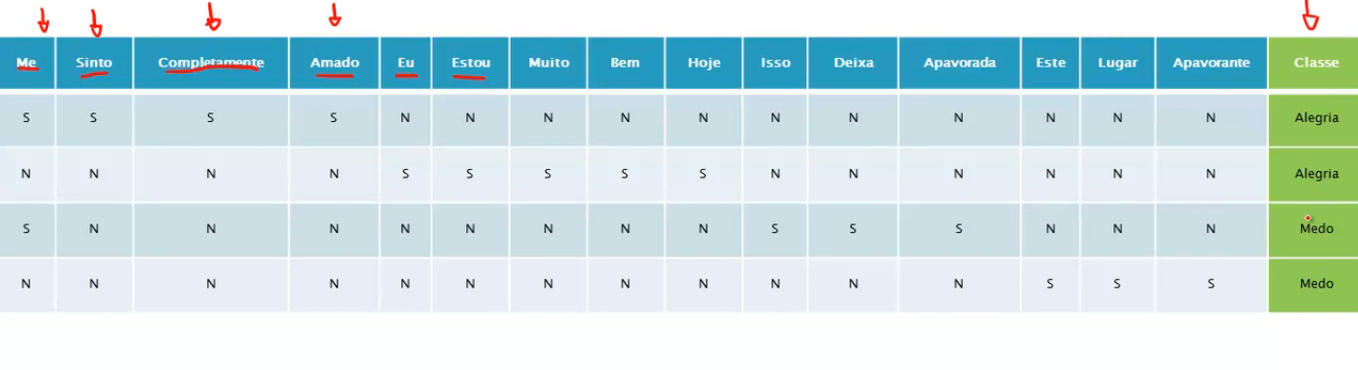

In [140]:
# Extrair se as palavras estão ou nao na frase
def extrair_palavras(texto):
  doc = set(texto)
  caracteristicas= {}
  for palavra in palavras_unicas:
    caracteristicas[palavra] = palavra in doc
  return caracteristicas

In [141]:
base_completa_train = nltk.classify.apply_features(extrair_palavras, lista_tuplas_train)
base_completa_test = nltk.classify.apply_features(extrair_palavras, lista_tuplas_test)
print(base_completa_train[0])

({')': False, '—': False, 'ê': False, '📲': False, '👋': False, '🐨': False, '🌋': False, 'ª': False, '💖': False, '🌸': False, '8': False, '😻': False, '😞': False, '/': False, '📌': False, 'ｔ': False, 'ã': False, '⌘': False, '̇': False, '🐮': False, 'α': False, '╮': False, ':': False, 'K': False, 'N': False, '📙': False, 'j': False, '🍟': False, '장': False, 'n': False, '해': False, '늘': False, '🔊': False, 'P': False, 'O': False, '🔄': False, '👸': False, 'c': True, '⭐': False, '👶': False, '🏏': False, '🐺': False, '♫': False, '😵': False, '💘': False, '😘': False, '🍉': False, 'u': False, '🤤': False, '🇱': False, '😢': False, 'e': True, '😎': False, '🎧': False, '💟': False, '🐇': False, '£': False, '😀': False, '🎂': False, '🤜': False, '💭': False, '😑': False, '😥': False, '¿': False, '🤛': False, '👷': False, '🍢': False, '|': False, 'º': False, 'M': False, '🔝': False, '💸': False, 'ó': False, '₍': False, 'ヤ': False, '🗳': False, '🙊': False, 'è': False, '🌟': False, 'ı': False, '🤘': False, '♥': False, '👉': False, '🇷':

### Criando o classificador

In [149]:
# Treinamento -> constroi a tabela de probabilidade
classificador = nltk.NaiveBayesClassifier.train(base_completa_train)
classificador.labels()

[1, 0]

In [150]:
classificador.show_most_informative_features(5)

Most Informative Features
                       g = False               1 : 0      =     45.3 : 1.0
                       ) = True                1 : 0      =     38.9 : 1.0
                       n = False               1 : 0      =     33.0 : 1.0
                       … = True                1 : 0      =     15.4 : 1.0
                       😔 = True                0 : 1      =     14.6 : 1.0


In [151]:
# Testando o modelo
nltk.download('rslp')
# Fazer a classificação da base de teste
previsoes = [classificador.classify(caracteristicas) for caracteristicas, _ in base_completa_test]
real = [caracteristicas for _, caracteristicas in base_completa_test]
print(nltk.accuracy(previsoes, real))

[nltk_data] Downloading package rslp to /root/nltk_data...
[nltk_data]   Package rslp is already up-to-date!


0.8628


Modelo treinado e com uma otima accurancy - **0.8628**

# utilizando o classificador na base de dados mensagens portugues

In [153]:
mensagens_pt = mensagens_pt.reset_index(drop=True)
mensagens_pt.head()

,CONTENT,Tamanho,Palavras,Idioma
0,olá nilo vi e-mail breve respondo lá,36,7,pt
1,olá jones tudo bem nome nilo guimarães assim p...,551,74,pt
2,olá diego nesse curso abaixo nada avançado -20...,77,8,pt
3,jones boa noite tudo bem algum curso sobre dep...,97,17,pt
4,olá davi puder repassar texto e-mail jones iae...,86,13,pt


Vamos percorrer o nosso dataframe, e para cada mensagem do CONTENT, vamos aplicar o pre-processamento nela e jogar no nosso algoritmo

In [158]:
mensagens_pt['Sentimento'] = None
for c in range(len(mensagens_pt)):
  frase = mensagens_pt['CONTENT'][c]
  frase = pre_processamento(frase)
  frase = extrair_palavras(frase)
  classe = classificador.classify(frase)
  if classe == 1:
    classe = 'Positivo'
  else:
    classe = 'Negativo'
  mensagens_pt['Sentimento'][c] = classe

<ipython-input-158-8be0c1fa59a4>:11: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [159]:
mensagens_pt.head(10)

,CONTENT,Tamanho,Palavras,Idioma,Sentimento
0,olá nilo vi e-mail breve respondo lá,36,7,pt,Positivo
1,olá jones tudo bem nome nilo guimarães assim p...,551,74,pt,Positivo
2,olá diego nesse curso abaixo nada avançado -20...,77,8,pt,Positivo
3,jones boa noite tudo bem algum curso sobre dep...,97,17,pt,Positivo
4,olá davi puder repassar texto e-mail jones iae...,86,13,pt,Positivo
5,olá jones tudo bem comprei alguns cursos sobre...,544,70,pt,Positivo
6,oi jones desejo 2021 exuberante família muitos...,414,50,pt,Positivo
7,"oi jones mercado crescerá 9,5 2020 10 2021 con...",322,41,pt,Positivo
8,jones clica botão direito cima vídeo coloca in...,118,17,pt,Positivo
9,olá renato poderia passar detalhes bom gostand...,54,8,pt,Positivo


<Axes: xlabel='Sentimento', ylabel='count'>

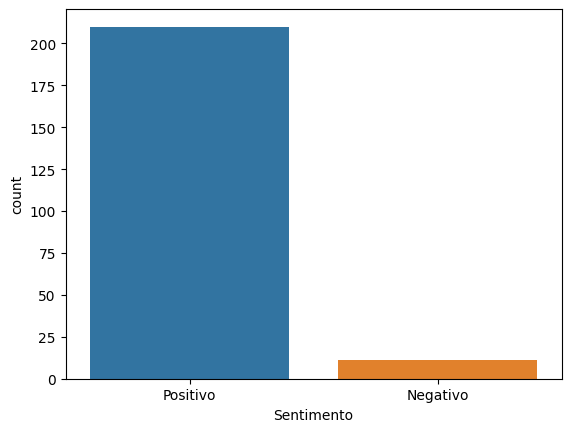

In [160]:
sns.countplot(x=mensagens_pt['Sentimento'])

Por se tratar de uma base de dados do Linkedin, os dados tendem a ser muito mais positivos do que negativos